# 1. Import Necessary Library

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf


import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [5]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# 3. Data Understanding

## 3.1 Initial Understanding

In [6]:
salary_data.shape

(30, 2)

In [7]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## 3.2 Assumption Check

### 3.2.1 Linearity Test - Linearity test has failed

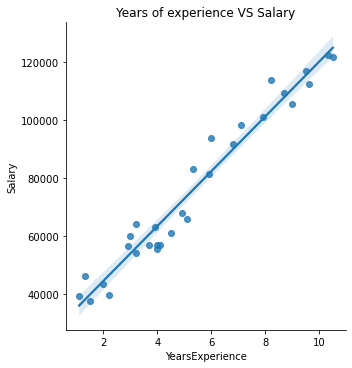

In [10]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)
plt.title('Years of experience VS Salary')
plt.show()

#### ***** Though the points is very close to the line still the points are not completely linear.*****

### 3.2.2 Normality Test - Normality test has failed

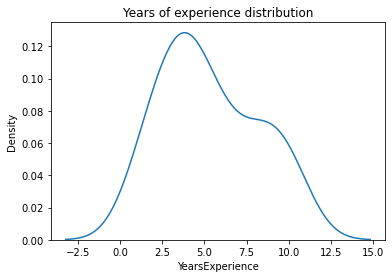

In [11]:
sns.distplot(a= salary_data['YearsExperience'],hist=False)
plt.title('Years of experience distribution')
plt.show()

# 4. Model Building and Model Training

In [14]:
linear_model = smf.ols(formula = 'Salary~YearsExperience', data = salary_data).fit()
linear_model

In [18]:
linear_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# 5. Model Testing

In [23]:
x_test = pd.DataFrame(data = {'YearsExperience': [16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]})
x_test

,YearsExperience
0,16
1,17
2,18
3,19
4,20
5,21
6,22
7,23
8,24
9,25


In [24]:
x_test.dtypes

YearsExperience    int64
dtype: object

In [28]:
y_test = linear_model.predict(x_test)
y_test = pd.DataFrame(data= {'Salary_pred': y_test})
y_test

,Salary_pred
0,176991.597342
1,186441.559663
2,195891.521985
3,205341.484306
4,214791.446628
5,224241.408949
6,233691.371271
7,243141.333592
8,252591.295914
9,262041.258235


In [34]:
pred_value = pd.concat( [x_test,y_test],axis = 1)